In [ ]:
import pandas as pd
df = pd.read_excel('/Active Customer Data_C-1.xlsx')

In [ ]:
y=df['Customer_Type__c']
y

0        Non - Recurring
1        Non - Recurring
2        Non - Recurring
3        Non - Recurring
4        Non - Recurring
              ...       
90062    Non - Recurring
90063    Non - Recurring
90064    Non - Recurring
90065    Non - Recurring
90066    Non - Recurring
Name: Customer_Type__c, Length: 90067, dtype: object

In [ ]:


df["BillingCountry"].replace({"United States": "US", "USA": "US","Alameda": "US","Baltimore": "US",
                              "Dakota": "US","Desoto": "US","stw.apinvoices@stwcorp.com": "US","Unites States": "US",
                              "U.S.A.": "US","Ontario": "Canada","CA": "Canada","CAN": "Canada","Georgia": "Canada",
                              "Mississauga": "Canada","Lake": "Canada","COOK": "US","3162": "US",
                              "4": "US",
                              "75058": "US","E": "Australia","AU": "Australia",
                  
                              }, inplace=True)

df["BillingState"].replace({"Ontario.": "ON"
                              }, inplace=True)

df["Lead_Source__c"].replace({"Phone Call Local.": "Phone","Phone_Call":"Phone"
                              }, inplace=True)



In [ ]:
df.info()
df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90067 entries, 0 to 90066
Columns: 184 entries, Id to DispatchMe_Secondary_Communication__c
dtypes: bool(25), datetime64[ns](5), float64(57), int64(14), object(83)
memory usage: 111.4+ MB


Id                                        object
IsDeleted                                   bool
MasterRecordId                           float64
Type                                      object
RecordTypeId                              object
                                          ...   
ReActivate_Lead__c                          bool
Secondary_Mobile_Phone__c                 object
Secondary_Contact__c                      object
DispatchMe_Primary_Communication__c         bool
DispatchMe_Secondary_Communication__c       bool
Length: 184, dtype: object

In [ ]:
df.columns

Index(['Id', 'IsDeleted', 'MasterRecordId', 'Type', 'RecordTypeId', 'ParentId',
       'BillingStreet', 'BillingCity', 'BillingState', 'BillingPostalCode',
       ...
       'DispatchMe_Notification_Reminder_Email__c',
       'DispatchMe_Notification_Reminder_SMS__c',
       'DispatchMe_Notification_Survey_Email__c',
       'DispatchMe_Notification_Survey_SMS__c', 'Customer_Sort__c',
       'ReActivate_Lead__c', 'Secondary_Mobile_Phone__c',
       'Secondary_Contact__c', 'DispatchMe_Primary_Communication__c',
       'DispatchMe_Secondary_Communication__c'],
      dtype='object', length=184)

In [ ]:
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
le = LabelEncoder()
df = df[df['Customer_Type__c'].notna()]
df1=df.loc[:,df.columns != 'Customer_Type__c']

df1 = df1.apply(lambda col: le.fit_transform(col.astype(str)), axis=0, result_type='expand')
X = df1
#independent columns


In [ ]:
y=df['Customer_Type__c']
y.isna().sum()

0

In [ ]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns.values)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Features','Score']  #naming the dataframe columns
topfeatures=featureScores.nlargest(25,'Score')
print(topfeatures)  #print 20 best feature


                                 Features         Score
30                       LastModifiedDate  4.084021e+08
32                         SystemModstamp  4.083926e+08
70              Lead_Type_Changed_Date__c  5.118157e+07
119                     Sales_Rep_Date__c  2.989799e+07
61                         Gained_Date__c  2.795153e+07
51                  Customer_ID_Number__c  2.740491e+07
129  Last_Commissioned_Work_Order_Date__c  2.052823e+07
167                  Last_Pricing_Date__c  1.777562e+07
140         Cleaning_Lat_Lng__Latitude__s  1.180555e+07
86                         Per_Quarter__c  9.026682e+06
28                            CreatedDate  8.989710e+06
88                       Primary_Payor__c  6.111428e+06
0                                      Id  5.920385e+06
169                   Eighteen_Char_Id__c  5.920385e+06
124                          X120_Days__c  5.639382e+06
112                Completed_Cleanings__c  5.129892e+06
57                  Driving_Directions__c  4.647

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


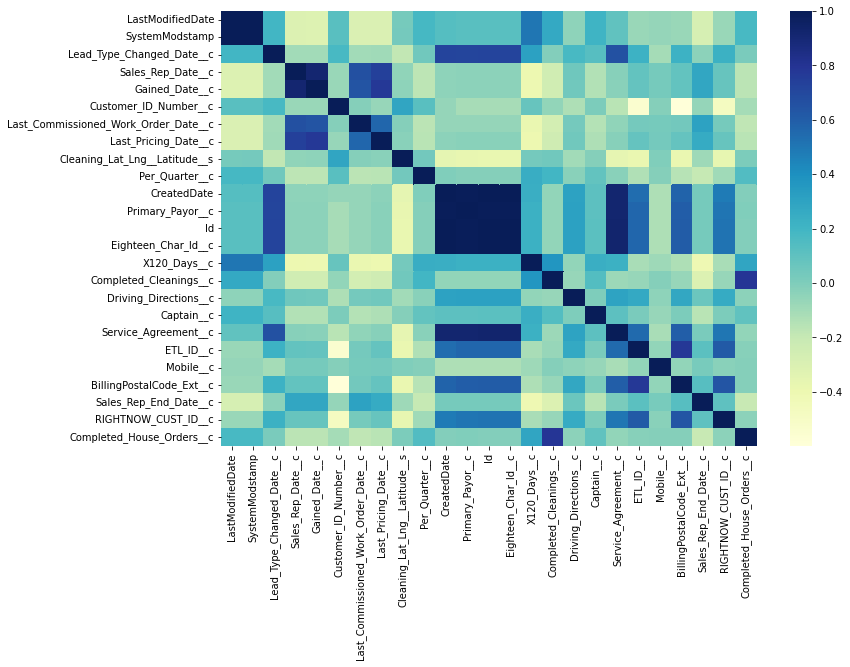

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
newdf=df1[topfeatures['Features']]
newdf1=newdf
newdf1['Customer_Type__c']=df['Customer_Type__c']

corr = newdf1.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr, cmap="YlGnBu")
plt.show()

In [ ]:
# Datest Splitting 
from sklearn import neighbors, datasets, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
newX = newdf.loc[ : , newdf.columns != 'Customer_Type__c'] 
newX=np.array(newX)
X_train, X_test, y_train, y_test = train_test_split(newX, y, random_state=0)
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:

from sklearn.metrics import confusion_matrix
# import the class
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# instantiate the model (using the default parameters)
logreg = LogisticRegression( solver='lbfgs', max_iter=100)

# fit the model with data
logreg.fit(X_train,y_train.values.ravel())

y_pred=logreg.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


array([[ 3135,    39],
       [   31, 19297]])

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision Score : ",metrics.precision_score(y_test, y_pred, 
                                           pos_label='positive',
                                           average='micro'))
print("Recall Score : ",metrics.recall_score(y_test, y_pred, 
                                           pos_label='positive',
                                           average='micro'))

Accuracy: 0.9968891654075194
Precision Score :  0.9968891654075194


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,


Recall Score :  0.9968891654075194


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


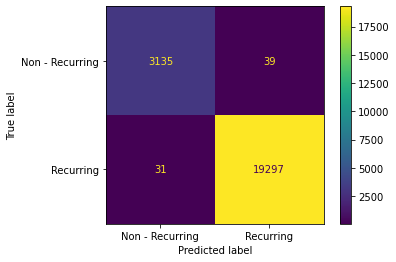

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(logreg, X_test, y_test) 
plt.show()


In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset


y_pred_Xgb=clf.predict(X_test)
cnf_matrix_xgb = metrics.confusion_matrix(y_test, y_pred_Xgb)
cnf_matrix_xgb

array([[ 3162,    12],
       [    9, 19319]])

In [ ]:
print("Accuracy XGB:",metrics.accuracy_score(y_test, y_pred_Xgb))
print("Precision Score XGB: ",metrics.precision_score(y_test, y_pred_Xgb, 
                                           pos_label='positive',
                                           average='micro'))
print("Recall Score XGB : ",metrics.recall_score(y_test, y_pred_Xgb, 
                                           pos_label='positive',
                                           average='micro'))

Accuracy XGB: 0.9990667496222558
Precision Score XGB:  0.9990667496222558


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,


Recall Score XGB :  0.9990667496222558


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


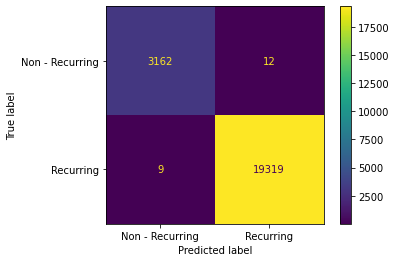

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, X_test, y_test) 
plt.show()


# Random Forest

In [ ]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf = RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [ ]:
y_pred_train=clf.predict(X_train)

In [ ]:
from sklearn import metrics
print("Train data Accuracy:",metrics.accuracy_score(y_train, y_pred_train))
print("Test data Accuracy:",metrics.accuracy_score(y_test, y_pred))

Train data Accuracy: 1.0
Test data Accuracy: 0.999244511598969


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


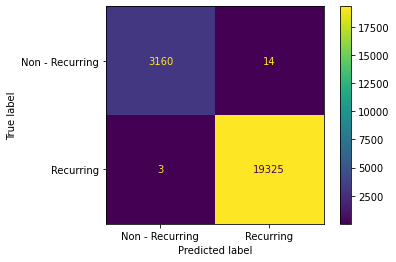

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, X_test, y_test) 

plt.show()

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

Non - Recurring       1.00      1.00      1.00      3174
      Recurring       1.00      1.00      1.00     19328

       accuracy                           1.00     22502
      macro avg       1.00      1.00      1.00     22502
   weighted avg       1.00      1.00      1.00     22502



In [ ]:
import pandas as pd
newX = newdf.loc[ : , newdf.columns != 'Customer_Type__c'] 
feature_imp = pd.Series(clf.feature_importances_,index=newX.columns).sort_values(ascending=False)
feature_imp

Sales_Rep_End_Date__c                   0.206428
Gained_Date__c                          0.176094
Sales_Rep_Date__c                       0.171456
Last_Pricing_Date__c                    0.138746
X120_Days__c                            0.059787
LastModifiedDate                        0.055787
SystemModstamp                          0.054532
Completed_Cleanings__c                  0.046283
Last_Commissioned_Work_Order_Date__c    0.035435
Per_Quarter__c                          0.028170
Completed_House_Orders__c               0.007916
Lead_Type_Changed_Date__c               0.003515
Captain__c                              0.003320
CreatedDate                             0.003041
Id                                      0.003013
Customer_ID_Number__c                   0.002892
Eighteen_Char_Id__c                     0.000962
Primary_Payor__c                        0.000649
Service_Agreement__c                    0.000518
BillingPostalCode_Ext__c                0.000467
Cleaning_Lat_Lng__La

In [ ]:
# Top 10 features
feature_imp = feature_imp[:10]

No handles with labels found to put in legend.


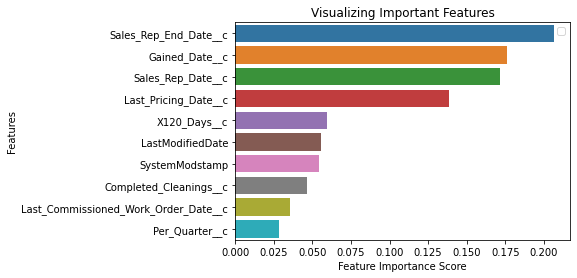

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

#XG boost

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

model = XGBClassifier()

# fit the model with the training data
model.fit(X_train, y_train)

# predict the target on the train dataset
predict_train = model.predict(X_train)
predict_test = model.predict(X_test)

In [ ]:
accuracy_train = accuracy_score(y_train, predict_train)
print('\naccuracy_score on train dataset : ', accuracy_train)

accuracy_test = accuracy_score(y_test,predict_test)
print('\naccuracy_score on test dataset : ', accuracy_test)


accuracy_score on train dataset :  0.9996296625485142

accuracy_score on test dataset :  0.9992889520931473


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


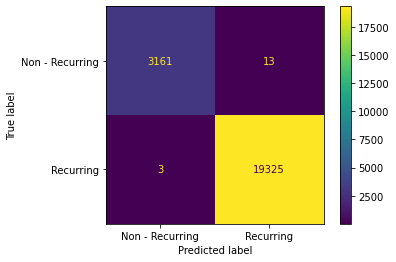

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model, X_test, y_test) 
plt.show()

https://machinelearningmastery.com/feature-selection-machine-learning-python/

https://stackoverflow.com/questions/58868256/scikit-learn-label-encoder-resulting-in-error-argument-must-be-a-string-or-numb

https://stackoverflow.com/questions/52269187/facing-valueerror-target-is-multiclass-but-average-binary

https://www.datacamp.com/tutorial/decision-tree-classification-python
